In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
import cv2

In [2]:
face_cascade=cv2.CascadeClassifier(r'C:\Users\snman\Desktop\Summer_2020\Udacity - Computer Vision Nanodegree nd891 v1.0.0\CVND_Exercises-master\face_recognition\haarcascade_frontalface_default.xml')

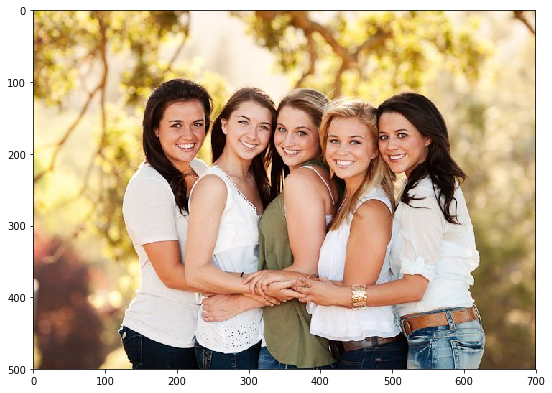

In [66]:
image=cv2.imread('g3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

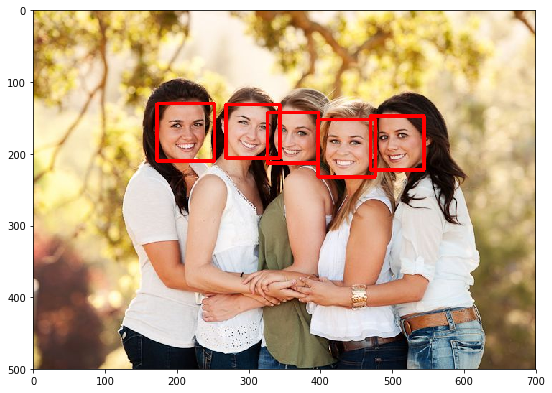

In [72]:
faces=face_cascade.detectMultiScale(image,1.3,2)

image_with_detection=image.copy()

for(x,y,w,h) in faces:
    cv2.rectangle(image_with_detection,(x,y),(x+w,y+h),(255,0,0),3)
    
fig=plt.figure(figsize=(9,9))

plt.imshow(image_with_detection)

In [24]:
model=tf.keras.models.load_model('facial_recognition_densenet_true_with_callbacks.h5')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 1) 0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 200, 200, 3)  0           input_2[0][0]                    
                                                                 input_2[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 206, 206, 3)  0           concatenate_1[0][0]              
____________________________________________________________________________________________

In [73]:
def Rescale(image,size=200):
    
    h, w = image.shape[:2]
    new_h,new_w=size,size
    image=image[:,:]
    image=cv2.resize(image,(new_h,new_w))
    return image                 

In [74]:
image_copy=image.copy()
height, width, _ = image.shape

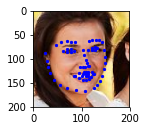

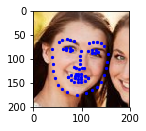

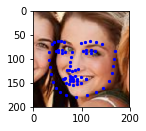

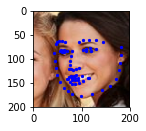

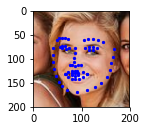

In [75]:
count=0
height, width, _ = image.shape
for (x,y,w,h) in (faces):
    count=count+1
    x_pad=0.20*w+0.5
    y_pad=0.20*h+0.5
    
    x_min,y_min=x-x_pad,y-y_pad
    x_max,y_max=x+w+x_pad,y+h+y_pad
    
    x_min,y_min=int(max(0,x_min)),int(max(0,y_min))
    x_max,y_max=int(min(x_max,width)),int(min(y_max,height))
    
    roi=image_copy[y_min:y_max,x_min:x_max]
    #plt.imshow(roi)
    image_copy_rescaled=Rescale(roi, size=200)
    #
    
    bw_roi=cv2.cvtColor(roi,cv2.COLOR_RGB2GRAY)
    roi_normalized = bw_roi/255.0
    roi_rescaled = Rescale(roi_normalized, size=200)
    roi_reshape=roi_rescaled.reshape(1,200,200,1)
    pts=model.predict(roi_reshape)
    
    x_pts=pts[0,0:68]
    x_pts=(x_pts*100.0)+100.0
    y_pts=pts[0,68:]
    y_pts=(y_pts*100.0)+100.0
    
    plt.figure(figsize=(10,10))
    plt.subplot(2,int(len(faces+1)),count)
    plt.imshow(image_copy_rescaled)
    plt.scatter(x_pts,y_pts,s=20, marker='.', c='b')   
    
    

22